In [51]:
import pandas as pd
import pylab as plt 
import seaborn as sns
import numpy as np
from datetime import datetime
from dateutil.relativedelta import relativedelta
from math import sqrt
from matplotlib import pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Function Definition

In [2]:
# The p_value is returned to verify Stationarity
def p_value(df_value):
    result = adfuller(df_value.dropna())
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

In [3]:
# Correlation and Differencing Plots (1 e 2).
def Differencing_Plot(df_value):  
    
    fig, axes = plt.subplots(3, 2, figsize=(8, 8))
    axes[0, 0].plot(df_value)
    axes[0, 0].set_title('Original Series')
    plot_acf(df_value, ax=axes[0, 1])

    axes[1, 0].plot(df_value.diff())
    axes[1, 0].set_title('1st Order Differencing')
    plot_acf(df_value.diff().dropna(), ax=axes[1, 1])

    axes[2, 0].plot(df_value.diff().diff())
    axes[2, 0].set_title('2nd Order Differencing')
    plot_acf(df_value.diff().diff().dropna(), ax=axes[2, 1])

    fig.tight_layout()
    return plt.show()

In [4]:
Temperature = pd.read_csv('Temperature.csv')
Temperature

,dt,City,Country,AverageTemperature,ANNO
0,1743-11-01,Århus,Denmark,6.068000,1743
1,1744-04-01,Århus,Denmark,5.788000,1744
2,1744-05-01,Århus,Denmark,10.644000,1744
3,1744-06-01,Århus,Denmark,14.051000,1744
4,1744-07-01,Århus,Denmark,16.082000,1744
...,...,...,...,...,...
8256236,2019-08-01,Cheyenne,US,21.555556,2019
8256237,2019-09-01,Cheyenne,US,22.888889,2019
8256238,2019-10-01,Cheyenne,US,7.055556,2019
8256239,2019-11-01,Cheyenne,US,-0.666667,2019


In [5]:
Temperature.dtypes

dt                     object
City                   object
Country                object
AverageTemperature    float64
ANNO                    int64
dtype: object

In [6]:
print(Temperature.isnull().sum())  

dt                    0
City                  0
Country               0
AverageTemperature    0
ANNO                  0
dtype: int64


In [7]:
#dt column type transformation
Temperature['dt']= pd.to_datetime(Temperature['dt'])

In [8]:
#selection of Milan data only
TempMi = Temperature.loc[(Temperature['City'] == 'Milan')]
TempMi.reset_index(inplace=True, drop=True)
TempMi

,dt,City,Country,AverageTemperature,ANNO
0,1743-11-01,Milan,Italy,3.310000,1743
1,1744-04-01,Milan,Italy,7.226000,1744
2,1744-05-01,Milan,Italy,9.394000,1744
3,1744-06-01,Milan,Italy,13.216000,1744
4,1744-07-01,Milan,Italy,15.366000,1744
...,...,...,...,...,...
3233,2019-08-01,Milan,Italy,25.777778,2019
3234,2019-09-01,Milan,Italy,24.500000,2019
3235,2019-10-01,Milan,Italy,18.944444,2019
3236,2019-11-01,Milan,Italy,11.555556,2019


In [9]:
#Preparation to display the time series
TempMi1= TempMi[['dt','AverageTemperature']]
TempMi1.set_index('dt', inplace = True)
TempMi1

,AverageTemperature
dt,
1743-11-01,3.310000
1744-04-01,7.226000
1744-05-01,9.394000
1744-06-01,13.216000
1744-07-01,15.366000
...,...
2019-08-01,25.777778
2019-09-01,24.500000
2019-10-01,18.944444


<AxesSubplot:xlabel='dt'>

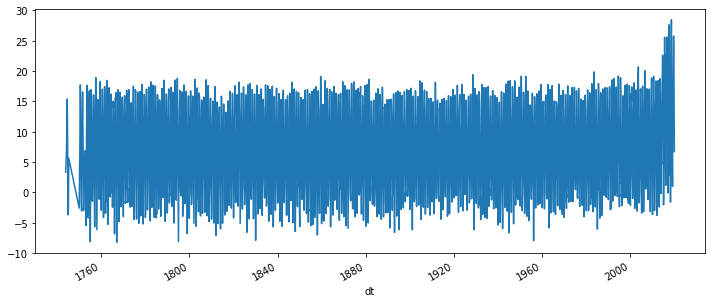

In [10]:
TempMi1['AverageTemperature'].plot(figsize=(12,5))

In [11]:
#selection only a few years
interval_year = (TempMi['ANNO'] > 1989) & (TempMi['ANNO'] <2020)
TempMi2 = TempMi.loc[interval_year]
TempMi2

,dt,City,Country,AverageTemperature,ANNO
2882,1990-01-01,Milan,Italy,-1.209000,1990
2883,1990-02-01,Milan,Italy,3.072000,1990
2884,1990-03-01,Milan,Italy,5.432000,1990
2885,1990-04-01,Milan,Italy,5.399000,1990
2886,1990-05-01,Milan,Italy,12.617000,1990
...,...,...,...,...,...
3233,2019-08-01,Milan,Italy,25.777778,2019
3234,2019-09-01,Milan,Italy,24.500000,2019
3235,2019-10-01,Milan,Italy,18.944444,2019
3236,2019-11-01,Milan,Italy,11.555556,2019


In [12]:
#Preparation to display the time series
TempMi2= TempMi2[['dt','AverageTemperature']]
TempMi2.set_index('dt', inplace = True)
TempMi2

,AverageTemperature
dt,
1990-01-01,-1.209000
1990-02-01,3.072000
1990-03-01,5.432000
1990-04-01,5.399000
1990-05-01,12.617000
...,...
2019-08-01,25.777778
2019-09-01,24.500000
2019-10-01,18.944444


<AxesSubplot:xlabel='dt'>

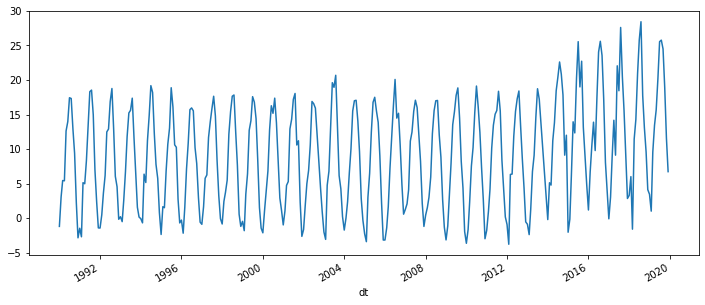

In [13]:
TempMi2['AverageTemperature'].plot(figsize=(12,5))

In [14]:
################################################################################################################################

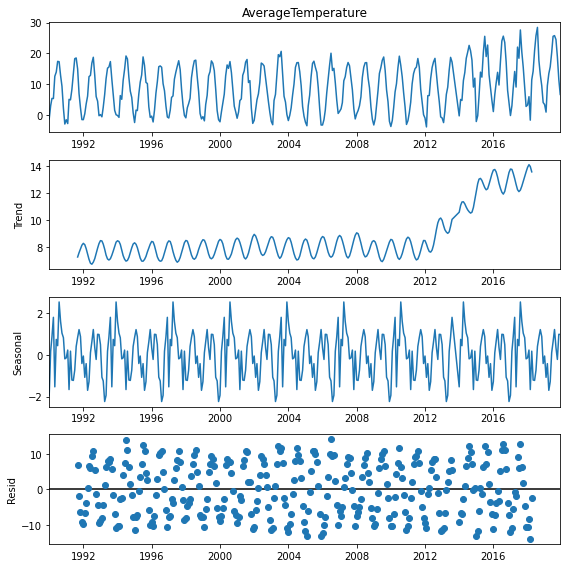

In [15]:
# Seasonal Variation Analyzing
plt.rcParams.update({'figure.figsize': (8,8)})
result_add = seasonal_decompose(TempMi2['AverageTemperature'], model = 'additive', period = 40)
decomposition_result = result_add.plot()

In [16]:
# ADF calculation
p_value(TempMi2['AverageTemperature'])

ADF Statistic: -0.485543
p-value: 0.894807


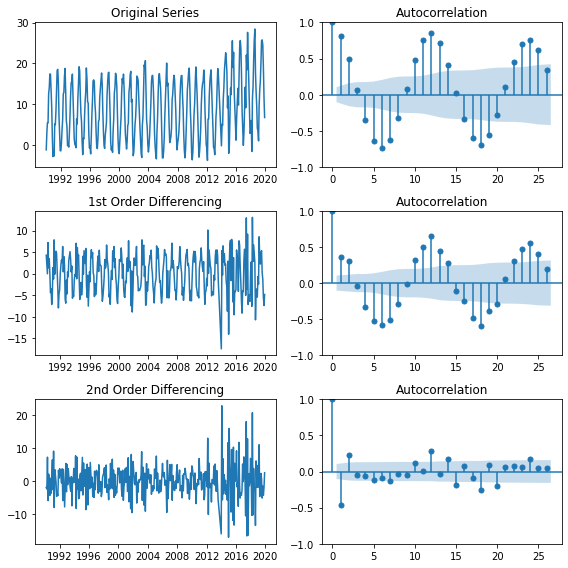

In [17]:
# Differencing plots representation
Differencing_Plot(TempMi2['AverageTemperature'])

In [18]:
p_value(TempMi2['AverageTemperature'].diff())

ADF Statistic: -7.327807
p-value: 0.000000


In [19]:
#DiffMi =TempMi2.diff()

In [20]:
#DiffMi=DiffMi.dropna()
#DiffMi

In [21]:
################################################################################################################################

In [22]:
def test_stationarity(timeseries):
        rolmean = timeseries.rolling(window=12).mean()
        rolstd = timeseries.rolling(window=12).std()

        #Plot rolling statistics
        orig = plt.plot(timeseries,label='Original')
        mean = plt.plot(rolmean, label='Rolling Mean')
        std = plt.plot(rolstd, label = 'Rolling Std')
        plt.legend(loc='best')
        plt.title('Rolling Mean & Standard Deviation')
        plt.show(block=False)

        #Perform Dickey-Fuller test
        print('Results of Dickey-Fuller Test:')

        dftest = adfuller(timeseries, autolag='AIC')
        dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
        print(dfoutput)

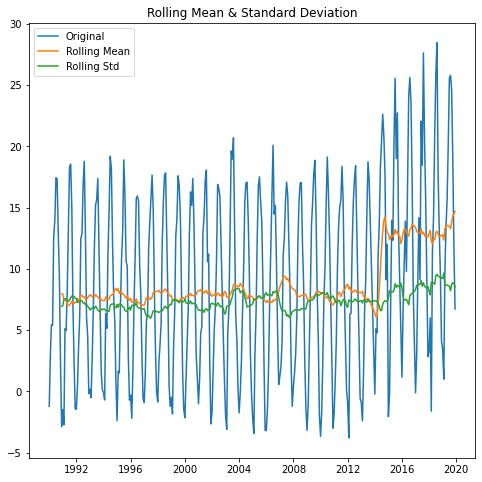

Results of Dickey-Fuller Test:
Test Statistic                  -0.485543
p-value                          0.894807
#Lags Used                      15.000000
Number of Observations Used    340.000000
dtype: float64


In [23]:
test_stationarity(TempMi2)

In [25]:
#print(TempMi2.isnull().sum())  

AverageTemperature    0
dtype: int64


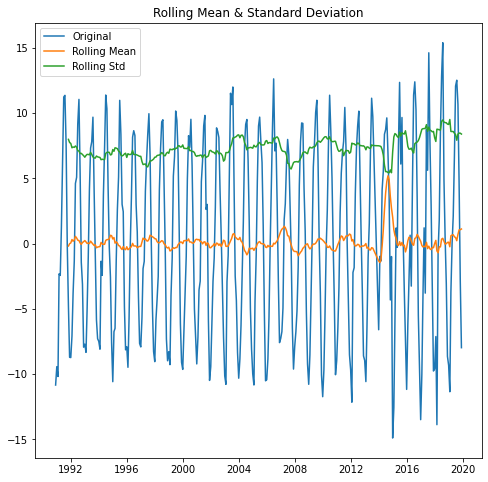

Results of Dickey-Fuller Test:
Test Statistic                -6.386420e+00
p-value                        2.158650e-08
#Lags Used                     1.700000e+01
Number of Observations Used    3.270000e+02
dtype: float64


In [32]:
ma = TempMi2.rolling(window=12).mean()
TempMi2_ma = TempMi2 - ma
TempMi2_ma=TempMi2_ma.dropna()
test_stationarity(TempMi2_ma)

C:\Users\daddc\anaconda3\envs\Ambiente\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


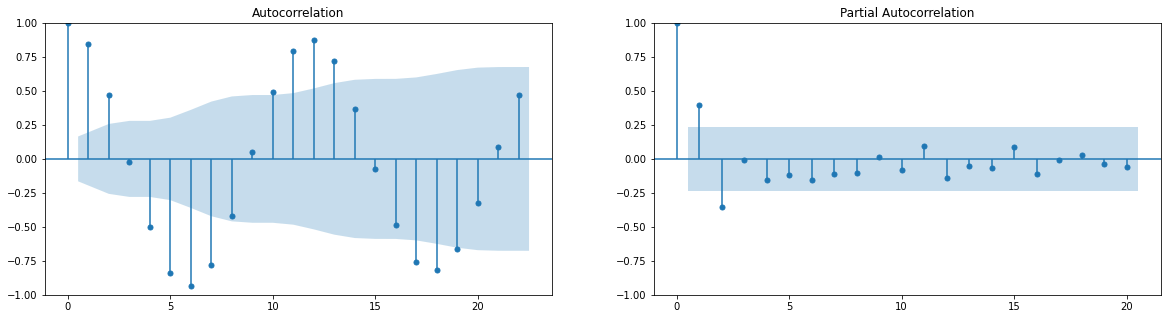

In [39]:
lag_acf= acf(TempMi2_ma, nlags = 140)
lag_pacf= pacf(TempMi2_ma, nlags = 70)
fig, ax = plt.subplots(1,2,figsize =(20,5))
plot_acf(lag_acf, ax=ax[0])
plot_pacf(lag_pacf, lags=20, ax=ax[1])
plt.show()

In [40]:
# Finding best p and q for the analysis

def findBestComposition(train, test):
    vMax = 3
    ps = []
    qs = []
    vs = []
    best_p = 0
    best_q = 0
    bestValue = None
    history = [x for x in train]
    predictions = []
    
    # Trying p from 0 to 2
    for p in range(vMax):
        # Trying q from 0 to 2
        for q in range(vMax):
            history = [x for x in train]
            predictions = []
            
            # Generating SARIMA model with specific p and q
            for t in range(len(test)):
                model = SARIMAX(history, order=(p,1,q), seasonal_order=(0, 1, 0, 12))
                model_fit = model.fit()
                output = model_fit.forecast()
                yhat = output[0]
                predictions.append(yhat)
                obs = test[t]
                history.append(obs)
                
            # Computing RMSE for the generated Model
            rmse = sqrt(mean_squared_error(test, predictions))
            if bestValue is None or rmse < bestValue:
                bestValue = rmse
                best_p = p
                best_q = q
            ps.append(p)
            qs.append(q)
            vs.append(rmse)
            
    # Creating a df containing RMSE for each p and q composition
    data = pd.DataFrame({'P': ps, 'Q': qs, 'RMSE': vs})
    return data.pivot('P', 'Q', 'RMSE'), bestValue, best_p, best_q

In [63]:
# Creating the model for the specific DF

def generateModel(analysis_df, title):
    
    # DF Manipulation
    df = analysis_df.copy()
    
    # Creating Train and Test set
    X = df.values
    size = int(len(X) * 0.66)
    train, test = X[0:size], X[size:len(X)]
    
    # Finding best p and q
    data_pivoted, rsme, p ,q = findBestComposition(train, test)
    
    history = [x for x in train]
    predictions = []
    
    # Creating SARIMA Model
    for t in range(len(test)):
        model = SARIMAX(history, order=(p,1,q), seasonal_order=(0, 1, 0, 12))
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
    
    # Computing RMSE with model results
    rmse = sqrt(mean_squared_error(test, predictions))
    
    array = df.index.values
    assex = []
    for i in range(len(df.index)-len(test), len(df.index)):
        assex.append(array[i])
    
    # Plotting Heatmap with p and q composition
    ax = sns.heatmap(data_pivoted, cmap="BuPu")
    ax.set_title('Best RSME:{0} with p:{1} q:{2}'.format(int(rsme), p, q))
    plt.show()
    
    # Plotting real and predicted data
    fig, ax = plt.subplots(figsize=(15,5))
    plt.plot(assex, test, label='Test Data')
    plt.title(title.format(int(rsme), p, q))
    plt.plot(assex, predictions, color='red', label='Predicted Data')
    ax.legend()
    plt.show()
    
    
    # Predicting Future Data from 2020 to 2022
    start = datetime.strptime("2020-01-01", "%Y-%m-%d")
    date_list = [start + relativedelta(months=x) for x in range(0,12)]
    future = pd.DataFrame(index=date_list, columns= df.columns)
    future['events'] = model_fit.predict(start = len(df), end = len(df)+11, dynamic= True)
    
    # Ploting Future Data from 2020 to 2022
    fig, ax = plt.subplots(figsize=(15,5))
    chart = sns.lineplot(data = future['events'], palette=['green'])
    chart.set_title('Forcasted Data for '+title)

C:\Users\daddc\anaconda3\envs\Ambiente\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\daddc\anaconda3\envs\Ambiente\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\daddc\anaconda3\envs\Ambiente\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\daddc\anaconda3\envs\Ambiente\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\

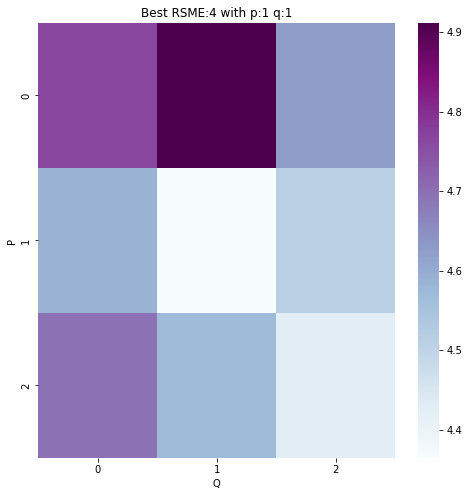

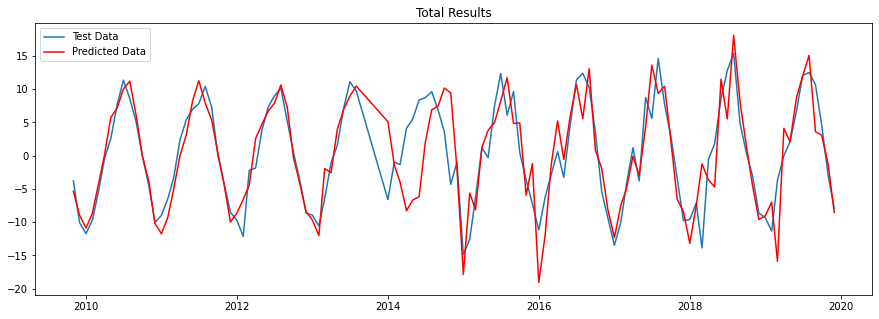

C:\Users\daddc\anaconda3\envs\Ambiente\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


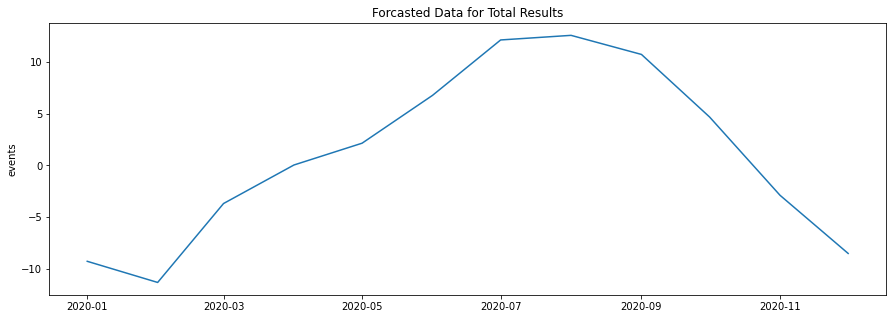

In [64]:
# Generating Model for Total DF

generateModel(TempMi2_ma, 'Total Results')